In [ ]:
'''
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

'''
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
from google.colab import files
upload=files.upload()

Saving book.csv to book.csv


In [3]:
book_data=pd.read_csv("book.csv")
book_data

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
book_data.values

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
book_data.shape

(2000, 11)

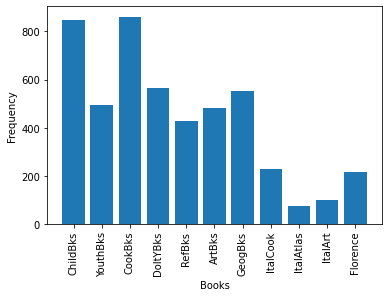

In [9]:
#visualising the frequency for the different book category

import matplotlib.pyplot as plt

plt.bar(book_data.columns,book_data.sum(axis=0))
plt.xticks(rotation=90)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

Apriori Algorithm

In [10]:
#min_support=0.4 and min_confidence=0.7
book_sales = apriori(book_data, min_support=0.1, use_colnames=True)
book_sales

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [11]:
rules = association_rules(book_sales, metric="lift", min_threshold=0.8)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [12]:
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


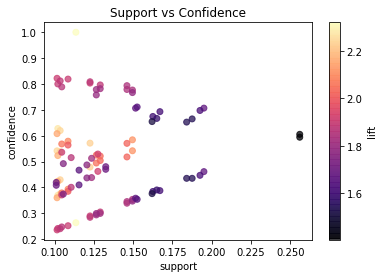

In [13]:
#scatter plot for suppport and confidence fot the first assocation rule
plt.scatter(rules['support'], rules['confidence'],c=rules['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

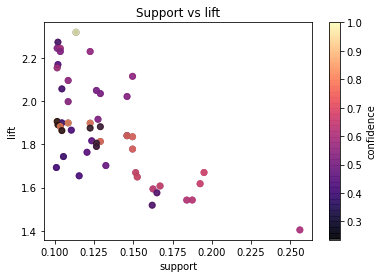

In [14]:
#scatter plot for suppport and confidence fot the first assocation rule with respect to confidence criteria
plt.scatter(rules['support'], rules['lift'],c=rules['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [15]:
#checking associated books for childbookd category

bookname='ChildBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
54,"(CookBks, ChildBks)",(RefBks)
77,"(GeogBks, ChildBks)",(ArtBks)
66,"(CookBks, ChildBks)",(GeogBks)
72,"(DoItYBks, ChildBks)",(GeogBks)
60,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)
48,"(CookBks, ChildBks)",(DoItYBks)
71,"(GeogBks, ChildBks)",(DoItYBks)
57,(ChildBks),"(RefBks, CookBks)"


In [16]:
#checking associated books for youthbook category

bookname='YouthBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
43,(YouthBks),"(CookBks, ChildBks)"
40,"(YouthBks, CookBks)",(ChildBks)
41,"(YouthBks, ChildBks)",(CookBks)
18,(YouthBks),(GeogBks)
16,(YouthBks),(ArtBks)
14,(YouthBks),(DoItYBks)
0,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)


In [17]:
#checking associated books for cookbooks category

bookname='CookBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
29,(CookBks),(ItalCook)
83,"(DoItYBks, CookBks)",(ArtBks)
96,"(ArtBks, CookBks)",(GeogBks)
95,"(GeogBks, CookBks)",(ArtBks)
54,"(CookBks, ChildBks)",(RefBks)
84,"(ArtBks, CookBks)",(DoItYBks)
66,"(CookBks, ChildBks)",(GeogBks)
90,"(DoItYBks, CookBks)",(GeogBks)
60,"(CookBks, ChildBks)",(ArtBks)
42,"(CookBks, ChildBks)",(YouthBks)


In [18]:
#checking associated books for DoitYbooks category

bookname='DoItYBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
83,"(DoItYBks, CookBks)",(ArtBks)
85,(DoItYBks),"(ArtBks, CookBks)"
90,"(DoItYBks, CookBks)",(GeogBks)
72,"(DoItYBks, ChildBks)",(GeogBks)
49,(DoItYBks),"(CookBks, ChildBks)"
92,(DoItYBks),"(GeogBks, CookBks)"
82,"(DoItYBks, ArtBks)",(CookBks)
74,(DoItYBks),"(GeogBks, ChildBks)"
88,"(GeogBks, DoItYBks)",(CookBks)
70,"(GeogBks, DoItYBks)",(ChildBks)


In [19]:
#checking associated books for RefBook category

bookname='RefBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
55,(RefBks),"(CookBks, ChildBks)"
52,"(RefBks, CookBks)",(ChildBks)
53,"(RefBks, ChildBks)",(CookBks)
37,(RefBks),(GeogBks)
30,(RefBks),(DoItYBks)
6,(RefBks),(ChildBks)
22,(RefBks),(CookBks)


In [20]:
#checking associated books for ArtBooks category

bookname='ArtBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
78,"(ArtBks, ChildBks)",(GeogBks)
86,(ArtBks),"(DoItYBks, CookBks)"
96,"(ArtBks, CookBks)",(GeogBks)
98,(ArtBks),"(GeogBks, CookBks)"
80,(ArtBks),"(GeogBks, ChildBks)"
84,"(ArtBks, CookBks)",(DoItYBks)
61,(ArtBks),"(CookBks, ChildBks)"
39,(ArtBks),(GeogBks)
82,"(DoItYBks, ArtBks)",(CookBks)
76,"(GeogBks, ArtBks)",(ChildBks)


In [21]:
#checking associated books for Geogbooks category

bookname='GeogBks'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
79,(GeogBks),"(ArtBks, ChildBks)"
97,(GeogBks),"(ArtBks, CookBks)"
95,"(GeogBks, CookBks)",(ArtBks)
77,"(GeogBks, ChildBks)",(ArtBks)
67,(GeogBks),"(CookBks, ChildBks)"
91,(GeogBks),"(DoItYBks, CookBks)"
73,(GeogBks),"(DoItYBks, ChildBks)"
89,"(GeogBks, CookBks)",(DoItYBks)
38,(GeogBks),(ArtBks)
71,"(GeogBks, ChildBks)",(DoItYBks)


In [23]:
#checking associated books for ItalCooks category

bookname='ItalCook'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents
28,(ItalCook),(CookBks)


In [24]:
#checking associated books for ItalAtlas category

bookname='ItalAtlas'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents


In [25]:
#checking associated books for Florence category

bookname='Florence'
rules_childBks=(rules.lift>1)&(rules['antecedents'].astype(str).str.contains(bookname))
rules.loc[rules_childBks,["antecedents","consequents"]]

,antecedents,consequents


In [27]:
#creating another association rule by taking different length in Apriori rule and diff minimum support
book_sales2=apriori(book_data,min_support=0.15,use_colnames=True)
book_sales2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [28]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [29]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
19,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125


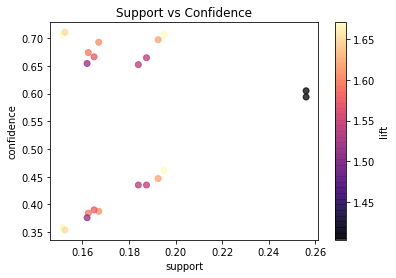

In [30]:
#scatter plot for support and confidence 
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

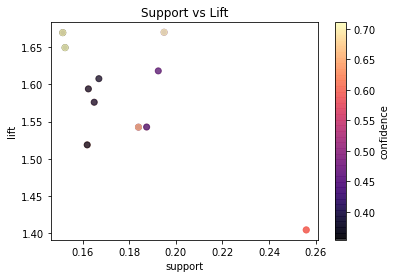

In [31]:
#scatter plot for support and lift
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [32]:
#creating another association rule by taking different length in Apriori
book_sales3 = apriori(book_data, min_support=0.05, use_colnames=True)
book_sales3


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"
96,0.0560,"(YouthBks, GeogBks, ArtBks, CookBks)"
97,0.0650,"(GeogBks, DoItYBks, ArtBks, CookBks)"
98,0.0510,"(DoItYBks, YouthBks, CookBks, GeogBks, ChildBks)"


In [33]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(GeogBks, ArtBks, CookBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(GeogBks, DoItYBks, CookBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(CookBks),"(GeogBks, DoItYBks, ArtBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
660,(GeogBks),"(DoItYBks, ArtBks, CookBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733


In [34]:
rules3.sort_values('lift',ascending = False,inplace=True)
rules3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
181,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
184,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
512,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
509,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
508,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


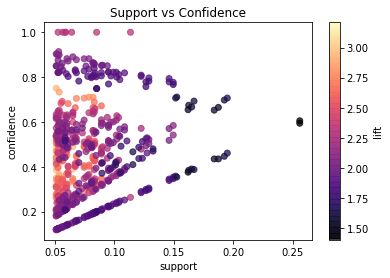

In [35]:
#scatter plot for support adn confidence
plt.scatter(rules3['support'], rules3['confidence'],c=rules3['lift'],cmap= 'magma',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

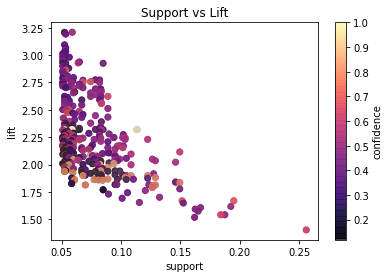

In [36]:
#scatter plot for support and lift
plt.scatter(rules3["support"], rules3["lift"],c=rules3['confidence'],cmap= 'magma',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [38]:
pd.DataFrame({'Association rule':pd.Series(['rule1','rule2','rule3']),'Lift':[max(rules.lift),max(rules2.lift),max(rules3.lift)]})

,Association rule,Lift
0,rule1,2.320186
1,rule2,1.670264
2,rule3,3.208789


In [39]:
#predicting the associated book for geology book using third association rule
bookname='GeogBks'
rules3_GeogBks =(rules3.lift>1) & (rules3['antecedents'].astype(str).str.contains(bookname))
rules3.loc[rules3_GeogBks,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
509,"(GeogBks, CookBks)","(ItalCook, ChildBks)",3.208556
508,"(GeogBks, ItalCook)","(CookBks, ChildBks)",3.204346
649,"(GeogBks, DoItYBks)","(ArtBks, CookBks, ChildBks)",3.191886
506,"(GeogBks, CookBks, ChildBks)",(ItalCook),3.094014
642,"(GeogBks, DoItYBks, ChildBks)","(ArtBks, CookBks)",3.065639
...,...,...,...
103,"(GeogBks, ChildBks)",(CookBks),1.778809
23,(GeogBks),(YouthBks),1.764017
40,(GeogBks),(DoItYBks),1.702385
10,(GeogBks),(ChildBks),1.670264
